# **Data Modeling**
## In this notebook we'll train and evaluate different machine learning models:

<br>

## 1. Logistic Regression
## 2. SVM
## 3. Decision Tree
## 4. Random Forest
## 5. Xgboost

<br>

## We'll evaluate the models using the following metrics:

<br>

## 1. Accuracy: $$accuracy = \frac{number\_of\_correct\_predictions}{total\_number\_of\_predictions}$$ 

<br>

## &nbsp;&nbsp;&nbsp; As we've seen in the data analysis part, the data is pretty balanced, so accuracy will be a good metric for evaluation (when the data is 
## &nbsp;&nbsp;&nbsp; imbalanced, the classifier can just label all the samples as the most frequent class and achive high accuracy).
<br>

## 2. Precision: $$ precision = \frac{True\_Positive}{True\_Positive+False\_Positive }$$

<br>

## 3. Recall (also called true positive rate): $$ recall = \frac{True\_Positive}{True\_Positive+False\_Negative }$$

<br>

## &nbsp;&nbsp;&nbsp; Recall is a good metric for measuring how good our classifier is classifing the positive class (low recall = high false negative = the 
## &nbsp;&nbsp;&nbsp; classifier is having trouble classifing the positive class)

<br>

## Note:
## there is a trade off between precision and recall. it's important to understand what is more important: high recall indicates that the false negative is low 
## and high precision indicates that the false positive is low. for example, for classifing if a tumor is benign or not, having a high recall is more
## important since false negative means that a sick patient won't get the treatment he needs. 
## * We can also use the AUC of the precision-recall curve for evaluating the model.

## **Import Libraries**

In [1]:
# ----- Pacages -----
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib as plt

import titanic_helpers as th

# ----- Models -----
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

# ---- Evaluation -----
from sklearn.metrics import accuracy_score


%matplotlib inline 

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 12


## Load The Data:

In [2]:
X_train = pd.read_pickle('prepared_data/X_train.pkl')
y_train = pd.read_pickle('prepared_data/y_train.pkl')

X_test = pd.read_pickle('prepared_data/X_test.pkl')
y_test = pd.read_pickle('prepared_data/y_test.pkl')

## **Dummy Classifier**:

<br>

## First we'll use a dummy classifier, which uses simple rules to make prediction, to have a baseline for copmparing the other models results to.

/home/nirlalum/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


+-----------+-------+
|   Metric  | Score |
+-----------+-------+
|  accuracy | 0.615 |
|   recall  | 0.000 |
| presicion | 0.000 |
+-----------+-------+


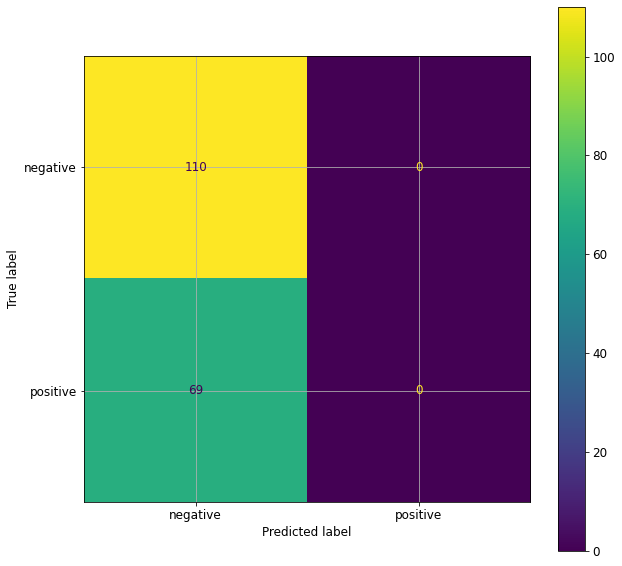

In [3]:
dummy_clf = DummyClassifier().fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

th.model_evaluation(y_test, y_pred)


## The dummy classifier labeled all samples with the most frequent label for Survived -> all samples were labeled as 0 (not survived).
## It correlated with the distribution of the classes as we've seen in the data analysis part.

## **Logistic Regression**

+-----------+-------+
|   Metric  | Score |
+-----------+-------+
|  accuracy | 0.812 |
|   recall  | 0.663 |
| presicion | 0.812 |
+-----------+-------+


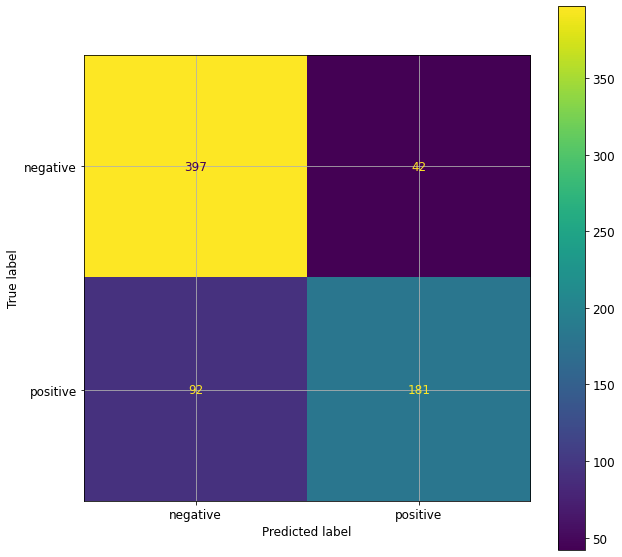

In [4]:
logistic_clf = LogisticRegression(penalty='l2', C=0.01, max_iter = 100000)
logistic_clf.fit(X_train, y_train)
y_pred = logistic_clf.predict(X_train)

th.model_evaluation(y_train, y_pred)

+-----------+-------+
|   Metric  | Score |
+-----------+-------+
|  accuracy | 0.799 |
|   recall  | 0.667 |
| presicion | 0.780 |
+-----------+-------+


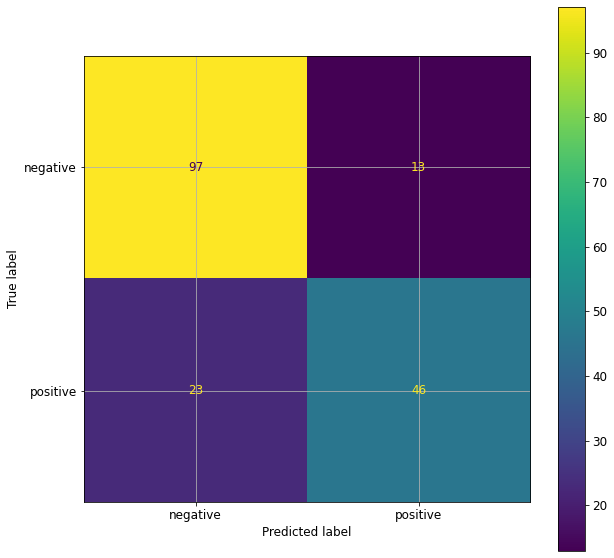

In [5]:
y_pred = logistic_clf.predict(X_test)

th.model_evaluation(y_test, y_pred)

